In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import datetime as dt

In [24]:
df = pd.read_csv("Resources/percent_all.csv")

df

,movie_id,release_date,percent_female
0,862,1995-10-30,0.181818
1,8844,1995-12-15,0.000000
2,15602,1995-12-22,0.000000
3,31357,1995-12-22,0.333333
4,11862,1995-02-10,0.500000
...,...,...,...
30672,390959,2000-10-22,0.250000
30673,289923,2000-10-03,0.000000
30674,222848,1995-01-01,0.000000
30675,30840,1991-05-13,0.500000


In [25]:
# sort data by release_date
df=df.sort_values("release_date")

df

,movie_id,release_date,percent_female
17904,43387,1950-01-01,0.000000
18314,109364,1950-01-01,0.000000
14064,83015,1950-01-01,0.000000
20273,43395,1950-01-01,0.000000
2195,43391,1950-01-04,0.000000
...,...,...,...
27614,374471,2017-09-14,0.333333
26877,300665,2017-09-14,0.111111
30312,439502,2017-09-22,0.000000
28941,398818,2017-10-27,0.125000


In [26]:
# change release_date column from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [27]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
dtype: object

In [28]:
# strip year from datetime column and make into new column
df['year'] = df['release_date'].dt.year 

In [29]:
df

,movie_id,release_date,percent_female,year
17904,43387,1950-01-01,0.000000,1950
18314,109364,1950-01-01,0.000000,1950
14064,83015,1950-01-01,0.000000,1950
20273,43395,1950-01-01,0.000000,1950
2195,43391,1950-01-04,0.000000,1950
...,...,...,...,...
27614,374471,2017-09-14,0.333333,2017
26877,300665,2017-09-14,0.111111,2017
30312,439502,2017-09-22,0.000000,2017
28941,398818,2017-10-27,0.125000,2017


In [30]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year                       int64
dtype: object

In [31]:
# check how many movies by year
count_by_year=df.groupby(["year"])["movie_id"].count()
count_by_year.tail(60)

year
1958     198
1959     202
1960     195
1961     178
1962     203
1963     201
1964     221
1965     221
1966     261
1967     242
1968     269
1969     252
1970     285
1971     303
1972     314
1973     280
1974     276
1975     263
1976     265
1977     264
1978     253
1979     268
1980     299
1981     294
1982     304
1983     292
1984     303
1985     302
1986     321
1987     369
1988     370
1989     364
1990     349
1991     351
1992     371
1993     421
1994     439
1995     491
1996     526
1997     522
1998     556
1999     572
2000     605
2001     657
2002     682
2003     647
2004     703
2005     818
2006     907
2007     911
2008    1032
2009    1085
2010    1008
2011    1046
2012    1058
2013    1116
2014    1183
2015    1135
2016    1018
2017     367
Name: movie_id, dtype: int64

In [32]:
# check mean and standard deviation 
count_by_year.describe()

count      68.000000
mean      451.132353
std       301.528044
min       172.000000
25%       249.500000
50%       303.500000
75%       580.250000
max      1183.000000
Name: movie_id, dtype: float64

In [33]:
# group by year and average female_percent for all movies that year
count_df = df.groupby(['year'])['percent_female'].mean()

In [34]:
count_df

year
1950    0.027519
1951    0.032495
1952    0.034082
1953    0.033427
1954    0.025205
          ...   
2013    0.210793
2014    0.216478
2015    0.212915
2016    0.205907
2017    0.252581
Name: percent_female, Length: 68, dtype: float64

In [35]:
# turn series to dataframe 
dataframe = count_df.to_frame()

DONT RERUN

In [36]:
#change year from axis to column 
dataframe = dataframe.rename_axis('year').reset_index()

In [37]:
dataframe

,year,percent_female
0,1950,0.027519
1,1951,0.032495
2,1952,0.034082
3,1953,0.033427
4,1954,0.025205
...,...,...
63,2013,0.210793
64,2014,0.216478
65,2015,0.212915
66,2016,0.205907


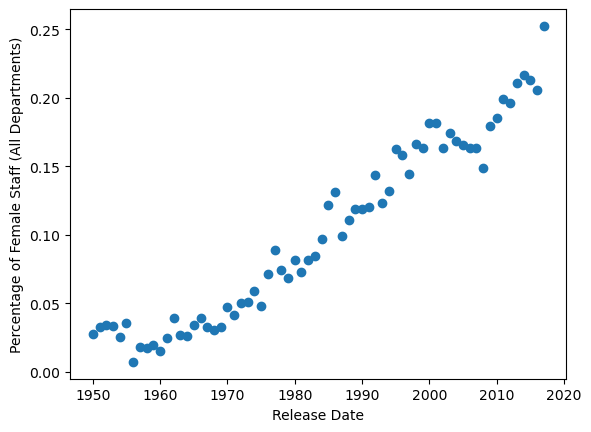

In [38]:
plt.scatter(dataframe.year, dataframe.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (All Departments)')
plt.show()

In [39]:
X = dataframe.year.values.reshape(-1, 1)

In [40]:
X

array([[1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [20

In [41]:
X.shape

(68, 1)

In [42]:
y = dataframe.percent_female

y

0     0.027519
1     0.032495
2     0.034082
3     0.033427
4     0.025205
        ...   
63    0.210793
64    0.216478
65    0.212915
66    0.205907
67    0.252581
Name: percent_female, Length: 68, dtype: float64

In [43]:
model = LinearRegression()

In [44]:
model.fit(X, y)

LinearRegression()

In [45]:
y_pred = model.predict(X)
print(y_pred.shape)

(68,)


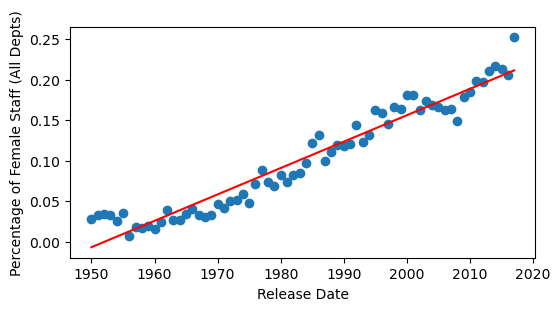

In [46]:
plt.figure(figsize=(6,3))

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (All Depts)')

plt.show()

In [47]:
print(model.coef_)
print(model.intercept_)

[0.00326333]
-6.370500225963147
